In [1]:
import kaleido
import pandas as pd
import numpy as np
import plotly.graph_objects as go
######## Search space #########
import sys
sys.path.append("../")
from search_space.RegNet import RegNet
from search_space.utils import create_widths_plot, scatter_results
# Initialize an empty list to store dictionaries
def results_to_df(path, name):
    data = []
    # Open the text file
    with open(path, 'r') as file:
        lines = file.readlines()
        # Initialize an empty dictionary to store data for each block
        block_data = {}
        for line in lines:
            # If the line contains dashes, it indicates the end of a block
            if '-------------------------' in line:
                # If block_data is not empty, add it to the list of data dictionaries
                if block_data:
                    data.append(block_data)
                    # Reset block_data for the next block
                    block_data = {}
            elif 'best_acc' in line:
                continue
            else:
                # Split the line by ':'
                #print(line)
                key, value = line.strip().split(': ')
                # Store the key-value pair in the block_data dictionary
                block_data[key] = value

    # Create a DataFrame from the list of dictionaries
    df = pd.DataFrame(data)

    # Convert columns to appropriate data types if needed
    df['epoch'] = df['epoch'].astype(int)
    df['lr'] = df['lr'].astype(float)
    df['train_acc'] = df['train_acc'].astype(float)
    df['train_loss'] = df['train_loss'].astype(float)
    df['test_acc'] = df['test_acc'].astype(float)
    df['test_acc_top5'] = df['test_acc_top5'].astype(float)
    df['test_loss'] = df['test_loss'].astype(float)
    df['epoch_time'] = df['epoch_time'].astype(float)
    df=df.assign(name=name)
    
    return df

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import json
import os

metadata_dict={}
metadata_dict["Caitie"]={'num_classes': 4,
                         'input_shape': [49260, 3, 64, 64],
                         'codename': 'Caitie',
                         'benchmark': 47.008,
                         }
metadata_dict["Adaline"]={'num_classes': 20,
                         'input_shape': [50000, 3, 28, 28],
                         'codename': 'Adaline',
                         'benchmark': 89.85}
metadata_dict["Chester"]={'input_shape': [49998, 12, 8, 8],
                         'codename': 'Chester',
                         'benchmark': 57.826,
                         'num_classes': 3}
metadata_dict["Gutenberg"]={'input_shape': [45000, 1, 27, 18],
                         'codename': 'Gutenberg',
                         'benchmark': 40.98,
                         'num_classes': 6}
metadata_dict["LaMelo"]={'num_classes': 10,
                         'codename': 'LaMelo',
                         'input_shape': [50000, 1, 24, 24],
                         'benchmark': 85.2}
metadata_dict["Mateo"]={'num_classes': 10,
                         'input_shape': [50000, 3, 28, 28],
                         'codename': 'Mateo',
                         'benchmark': 90.87}
metadata_dict["Sadie"]={'input_shape': [50000, 3, 64, 64],
                         'codename': 'Sadie',
                         'benchmark': 80.33,
                         'num_classes': 10}
def get_predictor_data_from_folder(studies):

    
    train_data=[]
    for study_name in studies: 
        

        metadata=metadata_dict[study_name]
        rg=RegNet(metadata,
                        W0=[16, 120, 8],
                        WA=[16, 64, 8],
                        WM=[2.05,2.9,0.05],
                        D=[8,22,1], 
                        G=[8,8,8], 
                        base_config=f"../configs/search_space/config.yaml")
        data=[]
        study_folder=f"/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/classifier_train/{study_name}"
        subjects= os.listdir(study_folder)

        subjects=[subject for subject in subjects if os.path.isdir(f"{study_folder}/{subject}")]
        print(subjects)
        for name in subjects:
            try:
                test_acc=results_to_df(f"{study_folder}/{name}/worklog.txt", f"{name}")[["epoch","test_acc","name"]]
                #test_acc=test_acc.rename(columns={"test_acc":"acc","test_loss":"test_acc"})
                #print(test_acc.columns)
                if len(test_acc)>49:
                    test_acc_piv = test_acc[["epoch","test_acc","name"]].pivot(index='name', columns='epoch', values='test_acc').add_prefix("epoch_").reset_index()
                    test_acc_piv["best_acc"]=test_acc["test_acc"].max()
                    
                    model, info=rg.load_model(config_file=f"{study_folder}/{name}/config.yaml")
                    test_acc_piv["gen"]=1
                    test_acc_piv["num_stages"]=info["num_stages"]
                    test_acc_piv["params"]=info["params"]
                    test_acc_piv["WA"]=info["WA"]
                    test_acc_piv["W0"]=info["W0"]
                    test_acc_piv["WM"]=info["WM"]
                    test_acc_piv["DEPTH"]=info["DEPTH"]
                    test_acc_piv["num_classes"]=metadata["num_classes"]
                    test_acc_piv["num_channels"]=metadata["input_shape"][1]
                    test_acc_piv["benchmark"]=metadata["benchmark"]
                    
                    #print(info)
                    data.append(test_acc_piv)
            except:
                    pass

        data=pd.concat(data)
        train_data.append(data)
    train_data=pd.concat(train_data)
    return train_data
    

# Regressor

['emerald_aardwark', 'onyx_gaur', 'rampant_myna', 'succinct_chimpanzee', 'red_caterpillar', 'thistle_owl', 'mahogany_collie', 'quizzical_caiman', 'cinnamon_dove', 'mature_hare', 'silky_dachshund', 'crystal_fennec', 'chubby_sawfish', 'amaranth_ringtail', 'mahogany_raven', 'cerulean_prawn', 'viridian_muskrat', 'original_reindeer', 'kind_armadillo', 'gifted_goldfish', 'roaring_snake', 'optimal_wildebeest', 'portable_griffin', 'outrageous_flounder', 'vehement_lizard', 'shrewd_muskrat', 'encouraging_whippet', 'eggplant_partridge', 'lavender_agama', 'sexy_skylark', 'brainy_cobra', 'delectable_crab', 'raspberry_bullfinch', 'red_pudu', 'pristine_woodpecker', 'awesome_wombat', 'red_bullmastiff', 'sly_saluki', 'denim_butterfly', 'white_cow', 'bulky_coati', 'helpful_ermine', 'monumental_trout', 'hypersonic_porcupine', 'carrot_bison', 'vivacious_beetle', 'tangerine_beaver', 'nostalgic_bison', 'vigilant_ibex', 'massive_jerboa', 'prompt_heron', 'powerful_chupacabra', 'mighty_crane', 'tourmaline_jaca

In [8]:
import json


def get_predictor_data(tests_folder,studies):
    train_data=[]
    for study_name in studies: 
        #study_name="tests_LaMelo_13_06_2024_02_11"
        file_path=f"{tests_folder}/{study_name}/{study_name}.evonas"
        with open(file_path, 'r') as file:
            results = json.load(file)

        individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
        data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]
        data_models["num_classes"]=results["metadata"]["num_classes"]
        data_models["num_channels"]=results["metadata"]["input_shape"][1]
        data_models["benchmark"]=results["metadata"]["benchmark"]
        print(study_name)
        print(results["metadata"])

        data=[]
        for index, row in individuals_df.iterrows():
            name=row["name"]
            generation=row["generation"]
            try:
                test_acc=results_to_df(f"{tests_folder}/{study_name}/Generation_{generation}/{name}/worklog.txt", f"{name}")[["epoch","test_acc","name"]]
                #test_acc=test_acc.rename(columns={"test_loss":"test_acc"})
                test_acc_piv = test_acc.pivot(index='name', columns='epoch', values='test_acc').add_prefix("epoch_").reset_index()
                test_acc_piv["gen"]=generation
                data.append(pd.merge(test_acc_piv, data_models, on="name"))
            except:
                pass
        data=pd.concat(data)
        train_data.append(data)
    train_data=pd.concat(train_data)
    return train_data

In [4]:
corr_scores={}
accuracies={}
test_dataset="Adaline"
tests_folder="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/full_training_random_20epochs_2gen_aug"
studies_train=[ 
               "tests_Caitie_18_06_2024_06_22",
               "tests_Gutenberg_17_06_2024_10_26", 
               "tests_LaMelo_17_06_2024_19_54",
               "tests_Mateo_17_06_2024_21_50",
               "tests_Sadie_18_06_2024_01_41",
               "tests_Chester_18_06_2024_00_21"

              ]
studies_test=["tests_Adaline_17_06_2024_17_44"]

train_data=get_predictor_data(tests_folder,studies_train)
test_data=get_predictor_data(tests_folder,studies_test)

#train_data2=get_predictor_data(tests_folder2,studies_train2)

/tmp/ipykernel_3940062/1498616753.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_3940062/1498616753.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_Caitie_18_06_2024_06_22
{'num_classes': 4, 'input_shape': [49260, 3, 64, 64], 'codename': 'Caitie', 'benchmark': 47.008, 'time_remaining': -38886.48230648041, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


/tmp/ipykernel_3940062/1498616753.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_3940062/1498616753.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_Gutenberg_17_06_2024_10_26
{'input_shape': [45000, 1, 27, 18], 'codename': 'Gutenberg', 'benchmark': 40.98, 'num_classes': 6, 'time_remaining': 6656.930239677429, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


/tmp/ipykernel_3940062/1498616753.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_3940062/1498616753.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_LaMelo_17_06_2024_19_54
{'num_classes': 10, 'codename': 'LaMelo', 'input_shape': [50000, 1, 24, 24], 'benchmark': 85.2, 'time_remaining': -1196.3611073493958, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


/tmp/ipykernel_3940062/1498616753.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_3940062/1498616753.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_Mateo_17_06_2024_21_50
{'num_classes': 10, 'input_shape': [50000, 3, 28, 28], 'codename': 'Mateo', 'benchmark': 90.87, 'time_remaining': -8204.630620241165, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


/tmp/ipykernel_3940062/1498616753.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_3940062/1498616753.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_Sadie_18_06_2024_01_41
{'input_shape': [50000, 3, 64, 64], 'codename': 'Sadie', 'benchmark': 80.33, 'num_classes': 10, 'time_remaining': -22070.273110866547, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


/tmp/ipykernel_3940062/1498616753.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_3940062/1498616753.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_Chester_18_06_2024_00_21
{'input_shape': [49998, 12, 8, 8], 'codename': 'Chester', 'benchmark': 57.826, 'num_classes': 3, 'time_remaining': -17269.000343322754, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


/tmp/ipykernel_3940062/1498616753.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_3940062/1498616753.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_Adaline_17_06_2024_17_44
{'num_classes': 20, 'input_shape': [50000, 3, 28, 28], 'codename': 'Adaline', 'benchmark': 89.85, 'time_remaining': 6603.339126586914, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


In [74]:
cols_train=[ 'epoch_1', 'epoch_2', 'epoch_3', 'epoch_4', 'epoch_5',
       'epoch_6', 'epoch_7', 'epoch_8', 'epoch_9', 'epoch_10', 'num_stages', 'params', 'WA', 'W0',
       'WM', 'DEPTH', 'num_classes', 'benchmark']
#cols_train=[ 'epoch_1', 'epoch_2', 'epoch_3', 'epoch_4', 'epoch_5', 'epoch_6', 'epoch_7','num_stages', 'params', 'WA', 'W0',
#       'WM', 'DEPTH', 'num_classes', 'benchmark']
#cols_train=[ 'epoch_1', 'epoch_2','epoch_3', 'epoch_4','num_stages', 'params', 'WA', 'W0',
#       'WM', 'DEPTH', 'num_classes', 'benchmark']

cols_test=['epoch_11',
       'epoch_12', 'epoch_13', 'epoch_14', 'epoch_15', 'epoch_16', 'epoch_17',
       'epoch_18', 'epoch_19', 'epoch_20']
cols_test=["best_acc"]
X=train_data[cols_train]
y=train_data[cols_test]
gens=[1]

X_test_new=test_data[test_data["gen"].isin(gens)][cols_train]
y_test_new=test_data[test_data["gen"].isin(gens)][cols_test]

# Performance predictor

Gradient Boosting Machines (GBMs) (e.g., XGBoost, LightGBM):
RandomForest

In [81]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Sample data
# X should include first 10 epochs' accuracy and model parameters
# y should include the accuracy of the subsequent 10 epochs
#X = np.random.rand(100, 15)  # 100 samples, 10 accuracies + 5 parameters
#y = np.random.rand(100, 10)  # 100 samples, next 10 epochs' accuracy

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the data
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Train a RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_regressor.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'RandomForestRegressor RMSE: {rmse_rf}')



/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor RMSE: 2.5073867931029903


In [11]:
# Predict and evaluate
#X_test_new = scaler.transform(X_test_new)

y_pred_rf = rf_regressor.predict(X_test_new)
rmse_rf = np.sqrt(mean_squared_error(y_test_new, y_pred_rf))
print(f'RandomForestRegressor RMSE: {rmse_rf}')


RandomForestRegressor RMSE: 13.511911125947334


In [17]:
y_test_new.reset_index(drop=True).sort_values("best_acc", ascending=False)

,best_acc
8,42.88
0,42.50
6,42.41
15,42.37
19,42.33
5,42.23
11,42.19
16,41.90
4,41.83
17,41.81


In [19]:
pd.DataFrame(y_pred_rf, columns=["pred_acc"]).sort_values("pred_acc", ascending=False)

,pred_acc
17,56.5878
11,55.6209
19,55.6166
8,55.6025
5,55.3889
16,55.3620
18,55.3368
15,55.2496
4,55.1870
7,55.1822


In [301]:
np.corrcoef(y_pred_rf[:][0:60],y_test_new.values[:][0:60].reshape(-1))

array([[1.        , 0.43816592],
       [0.43816592, 1.        ]])

In [303]:
np.corrcoef(X_test_new["epoch_10"].values[:20].reshape(-1),y_test_new[:20].values[:].reshape(-1))

array([[1.        , 0.90872616],
       [0.90872616, 1.        ]])

In [123]:
y_pred_rf

array([59.719 , 58.936 , 56.4102, 60.0944, 59.9151, 60.3432, 60.3657,
       61.5988, 60.8167, 59.7897, 59.6178, 60.3493, 59.7265, 59.0941,
       56.9798, 61.0983, 61.577 , 60.5617, 61.8244, 61.6281, 60.7059,
       61.0587, 61.5172, 61.6237, 60.298 , 60.2908, 61.3481, 61.0361,
       61.2968, 61.2947, 60.2082, 62.1292, 61.1402, 61.8315, 60.477 ,
       60.1731, 60.2328, 60.4864, 62.0043, 61.3174, 60.997 , 61.1983,
       61.2318, 60.3409, 62.127 , 61.6775, 60.9963, 61.133 , 61.3531,
       60.9014, 61.0975, 60.2715, 61.6547, 59.5361, 61.6507, 60.9652,
       60.5947, 61.6178, 60.2765, 60.58  ])

In [8]:
# Train a Support Vector Regressor
svr = SVR()
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf']
}
param_grid = {
    'C': [0.1],
    'epsilon': [0.01],
    'kernel': [ 'poly']
}
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Predict and evaluate
best_svr = grid_search.best_estimator_
y_pred_svr = best_svr.predict(X_test)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
print(f'Support Vector Regressor RMSE: {rmse_svr}')


Support Vector Regressor RMSE: 16.52822026363254


/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when 

In [9]:
y_pred_rf = best_svr.predict(X_test_new)
rmse_rf = np.sqrt(mean_squared_error(y_test_new, y_pred_rf))
print(f'RandomForestRegressor RMSE: {rmse_rf}')

RandomForestRegressor RMSE: 42.694856840907796


In [ ]:
print("yes")

In [24]:
# Install scikit-learn if not already installed
#%pip install -q scikit-learn

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize and fit the GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)
gb_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_regressor.predict(X_test)

# Calculate RMSE
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(f'GradientBoostingRegressor RMSE: {rmse_gb}')


/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor RMSE: 1.3756102173972162


In [25]:
y_pred_rf = gb_regressor.predict(X_test_new)
rmse_rf = np.sqrt(mean_squared_error(y_test_new, y_pred_rf))
print(f'GradientBoostingRegressor RMSE: {rmse_rf}')

RandomForestRegressor RMSE: 14.966455878098962


In [22]:
y_pred_rf

array([56.32557 , 56.43364 , 56.237415, 56.43364 , 56.32557 , 56.43364 ,
       56.43364 , 56.43364 , 56.43364 , 56.43364 , 56.516373, 56.516373,
       56.43364 , 56.43364 , 56.516373, 56.32557 , 56.32557 , 56.516373,
       56.516373, 56.32557 ], dtype=float32)

In [26]:
pd.DataFrame(y_pred_rf, columns=["pred_acc"]).sort_values("pred_acc", ascending=False)

,pred_acc
10,56.672900
18,56.672900
17,56.672900
11,56.672900
14,56.672900
3,56.594088
6,56.594088
7,56.594088
8,56.594088
9,56.594088


In [288]:
import numpy as np

In [289]:
np.corrcoef(y_pred_rf[:],y_test_new.values[:].reshape(-1))

array([[ 1.        , -0.04096569],
       [-0.04096569,  1.        ]])

In [212]:
np.corrcoef(X_test_new["epoch_7"].values.reshape(-1)[:],y_test_new.values.reshape(-1)[:])

array([[1.        , 0.83109927],
       [0.83109927, 1.        ]])

# Ranking classifier

In [47]:
test_dataset="Chester"
corr_scores={}
accuracies={}
test_accuracies={}
epochs_results={}

In [48]:
train_data=get_predictor_data_from_folder(studies=["Sadie","Caitie", "Adaline","Gutenberg","LaMelo","Mateo"])
test_data=get_predictor_data_from_folder(studies=["Chester"])

['complex_anaconda', 'tunneling_shrimp', 'orange_dogfish', 'gainful_muskox', 'grumpy_goat', 'frisky_flamingo', 'attractive_galago', 'jade_cow', 'turquoise_pogona', 'classic_rottweiler', 'smoky_lion', 'romantic_mamba', 'pretty_leech', 'acrid_mule', 'beryl_dugong', 'brass_jackrabbit', 'amigurumi_smilodon', 'sweet_sawfly', 'sandy_albatross', 'unyielding_tamarin', 'bizarre_owl', 'congenial_wildebeest', 'origami_cuckoo', 'ebony_bulldog', 'mega_cuckoo', 'accomplished_angelfish', 'giga_basilisk', 'radiant_seriema', 'arcane_aardwark', 'true_viper', 'quantum_moth', 'ginger_skunk', 'friendly_whale', 'teal_mouse', 'imperial_hyrax', 'auburn_dingo', 'fast_nautilus', 'aspiring_slug', 'magnificent_foxhound', 'juicy_cuscus', 'stoic_lobster', 'notorious_agouti', 'attentive_chital', 'brawny_partridge', 'graceful_muskox', 'calm_kudu', 'lively_grebe', 'accelerated_pelican', 'beautiful_bobcat', 'maize_pug', 'crimson_caiman', 'helpful_groundhog', 'bright_labradoodle', 'finicky_horse', 'agile_grouse', 'horne

In [49]:
train_data.benchmark.value_counts()

benchmark
89.850    120
40.980    120
85.200    120
90.870    120
80.330    118
47.008    117
Name: count, dtype: int64

In [50]:
test_data.benchmark.value_counts()

benchmark
57.826    120
Name: count, dtype: int64

In [46]:
import pandas as pd
from itertools import combinations

test_dataset="Chester"
tests_folder="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/full_training_random_20epochs_2gen_aug"
studies_train=[ 
               "tests_Caitie_18_06_2024_06_22",
               "tests_Gutenberg_17_06_2024_10_26", 
               "tests_LaMelo_17_06_2024_19_54",
               "tests_Mateo_17_06_2024_21_50",
               "tests_Sadie_18_06_2024_01_41",
#               #"tests_Chester_18_06_2024_00_21",
               "tests_Adaline_17_06_2024_17_44"

              ]


train_data=get_predictor_data(tests_folder,studies_train)
tests_folder="/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/full_training_random_20epochs_2gen_aug"
studies_test=["tests_Chester_18_06_2024_00_21"]
test_data=get_predictor_data(tests_folder,studies_test)


/tmp/ipykernel_1003495/1632822477.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_1003495/1632822477.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_Caitie_18_06_2024_06_22
{'num_classes': 4, 'input_shape': [49260, 3, 64, 64], 'codename': 'Caitie', 'benchmark': 47.008, 'time_remaining': -38886.48230648041, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


/tmp/ipykernel_1003495/1632822477.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_1003495/1632822477.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_Gutenberg_17_06_2024_10_26
{'input_shape': [45000, 1, 27, 18], 'codename': 'Gutenberg', 'benchmark': 40.98, 'num_classes': 6, 'time_remaining': 6656.930239677429, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


/tmp/ipykernel_1003495/1632822477.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_1003495/1632822477.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_LaMelo_17_06_2024_19_54
{'num_classes': 10, 'codename': 'LaMelo', 'input_shape': [50000, 1, 24, 24], 'benchmark': 85.2, 'time_remaining': -1196.3611073493958, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


/tmp/ipykernel_1003495/1632822477.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_1003495/1632822477.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_Mateo_17_06_2024_21_50
{'num_classes': 10, 'input_shape': [50000, 3, 28, 28], 'codename': 'Mateo', 'benchmark': 90.87, 'time_remaining': -8204.630620241165, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


/tmp/ipykernel_1003495/1632822477.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_1003495/1632822477.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_Sadie_18_06_2024_01_41
{'input_shape': [50000, 3, 64, 64], 'codename': 'Sadie', 'benchmark': 80.33, 'num_classes': 10, 'time_remaining': -22070.273110866547, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


/tmp/ipykernel_1003495/1632822477.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_1003495/1632822477.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_Adaline_17_06_2024_17_44
{'num_classes': 20, 'input_shape': [50000, 3, 28, 28], 'codename': 'Adaline', 'benchmark': 89.85, 'time_remaining': 6603.339126586914, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


/tmp/ipykernel_1003495/1632822477.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  individuals_df=pd.read_json(results["results"]).sort_values("name")[["name","generation"]]
/tmp/ipykernel_1003495/1632822477.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_models=pd.read_json(results["results"])[["name","num_stages","params","WA","W0","WM","DEPTH", "best_acc"]]


tests_Chester_18_06_2024_00_21
{'input_shape': [49998, 12, 8, 8], 'codename': 'Chester', 'benchmark': 57.826, 'num_classes': 3, 'time_remaining': -17269.000343322754, 'train_config_path': 'configs/train/vanilla_generation_adam.yaml', 'experiment_name': 'tests/augmentations_test', 'mode': 'NAS'}


In [18]:
train_data.columns

Index(['name', 'epoch_1', 'epoch_2', 'epoch_3', 'epoch_4', 'epoch_5',
       'epoch_6', 'epoch_7', 'epoch_8', 'epoch_9', 'epoch_10', 'epoch_11',
       'epoch_12', 'epoch_13', 'epoch_14', 'epoch_15', 'epoch_16', 'epoch_17',
       'epoch_18', 'epoch_19', 'epoch_20', 'epoch_21', 'epoch_22', 'epoch_23',
       'epoch_24', 'epoch_25', 'epoch_26', 'epoch_27', 'epoch_28', 'epoch_29',
       'epoch_30', 'epoch_31', 'epoch_32', 'epoch_33', 'epoch_34', 'epoch_35',
       'epoch_36', 'epoch_37', 'epoch_38', 'epoch_39', 'epoch_40', 'epoch_41',
       'epoch_42', 'epoch_43', 'epoch_44', 'epoch_45', 'epoch_46', 'epoch_47',
       'epoch_48', 'epoch_49', 'epoch_50', 'best_acc', 'gen', 'num_stages',
       'params', 'WA', 'W0', 'WM', 'DEPTH', 'num_classes', 'num_channels',
       'benchmark'],
      dtype='object', name='epoch')

In [40]:
train_data.best_acc

0    95.50
0    95.54
0    93.27
0    95.13
0    94.96
     ...  
0    97.05
0    96.36
0    96.79
0    94.59
0    94.86
Name: best_acc, Length: 715, dtype: float64

In [51]:
# Standardize data
standardize=True
from sklearn.preprocessing import StandardScaler
if standardize:
    def standard_scaler(group):
        scaler = StandardScaler()
        cols=list(group.columns[1:])
        cols.remove("best_acc")
        cols.remove("benchmark")
        cols.remove("gen")
        group[cols] = scaler.fit_transform(group[cols])

        return group
    train_data = train_data.groupby('benchmark').apply(standard_scaler)
    train_data=train_data.reset_index(drop=True)

    test_data = test_data.groupby('benchmark').apply(standard_scaler)
    test_data=test_data.reset_index(drop=True)

/tmp/ipykernel_1003495/753088192.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_data = train_data.groupby('benchmark').apply(standard_scaler)


/tmp/ipykernel_1003495/1312611676.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_data = test_data.groupby('benchmark').apply(standard_scaler)


In [54]:
import pandas as pd
import numpy as np
from itertools import combinations

# Initialize an empty list to hold the final data
total_data = []

# Iterate over unique benchmark scores
for benchmark_score in train_data['benchmark'].unique():
    filtered_df = train_data[train_data['benchmark'] == benchmark_score].reset_index(drop=True)
    pairs = np.array(list(combinations(filtered_df.index, 2)))
    
    # Extract constant columns
    num_classes = filtered_df["num_classes"].iloc[0]
    num_channels = filtered_df["num_channels"].iloc[0]

    # Prepare list to collect combined data
    combined_data = []

    for idx1, idx2 in pairs:
        row1 = filtered_df.loc[idx1]
        row2 = filtered_df.loc[idx2]

        combined_row = {f'epoch_{i}_A': row1[f'epoch_{i}'] for i in [5,10,15,20]}
        combined_row.update({f'epoch_{i}_B': row2[f'epoch_{i}'] for i in [5,10,15,20]})
        combined_row.update({
            'name_A': row1['name'],
            'name_B': row2['name'],
            'num_stages_A': row1['num_stages'],
            'params_A': row1['params'],
            'WA_A': row1['WA'],
            'W0_A': row1['W0'],
            'WM_A': row1['WM'],
            'DEPTH_A': row1['DEPTH'],
            'gen_A': row1['gen'],
            'best_acc_A': row1['best_acc'],
            'num_stages_B': row2['num_stages'],
            'params_B': row2['params'],
            'WA_B': row2['WA'],
            'W0_B': row2['W0'],
            'WM_B': row2['WM'],
            'DEPTH_B': row2['DEPTH'],
            'gen_B': row2['gen'],
            'best_acc_B': row2['best_acc'],
            'label': 1 if row1['best_acc'] > row2['best_acc'] else 0,
            'benchmark': benchmark_score,
            'num_classes': num_classes,
            'num_channels': num_channels
        })

        combined_data.append(combined_row)

    combined_df = pd.DataFrame(combined_data)
    total_data.append(combined_df)

# Concatenate all dataframes
total_data = pd.concat(total_data).reset_index(drop=True)



In [55]:
import pandas as pd
import numpy as np
from itertools import combinations

# Initialize an empty list to hold the final data
total_data_test = []

# Iterate over unique benchmark scores
for benchmark_score in test_data['benchmark'].unique():
    filtered_df = test_data[test_data['benchmark'] == benchmark_score].reset_index(drop=True)
    pairs = np.array(list(combinations(filtered_df.index, 2)))
    
    # Extract constant columns
    num_classes = filtered_df["num_classes"].iloc[0]
    num_channels = filtered_df["num_channels"].iloc[0]

    # Prepare list to collect combined data
    combined_data = []

    for idx1, idx2 in pairs:
        row1 = filtered_df.loc[idx1]
        row2 = filtered_df.loc[idx2]

        combined_row = {f'epoch_{i}_A': row1[f'epoch_{i}'] for i in [5, 10, 15, 20]}
        combined_row.update({f'epoch_{i}_B': row2[f'epoch_{i}'] for i in [5, 10, 15, 20]})
        combined_row.update({
            'name_A': row1['name'],
            'name_B': row2['name'],
            'num_stages_A': row1['num_stages'],
            'params_A': row1['params'],
            'WA_A': row1['WA'],
            'W0_A': row1['W0'],
            'WM_A': row1['WM'],
            'DEPTH_A': row1['DEPTH'],
            'gen_A': row1['gen'],
            'best_acc_A': row1['best_acc'],
            'num_stages_B': row2['num_stages'],
            'params_B': row2['params'],
            'WA_B': row2['WA'],
            'W0_B': row2['W0'],
            'WM_B': row2['WM'],
            'DEPTH_B': row2['DEPTH'],
            'gen_B': row2['gen'],
            'best_acc_B': row2['best_acc'],
            'label': 1 if row1['best_acc'] > row2['best_acc'] else 0,
            'benchmark': benchmark_score,
            'num_classes': num_classes,
            'num_channels': num_channels
        })

        combined_data.append(combined_row)

    combined_df = pd.DataFrame(combined_data)
    total_data_test.append(combined_df)

# Concatenate all dataframes
total_data_test = pd.concat(total_data_test).reset_index(drop=True)




In [56]:
total_data.num_classes.value_counts()

num_classes
0.0    42249
Name: count, dtype: int64

In [107]:
cols_train=[  
            "epoch_5_A","epoch_5_B","epoch_10_A","epoch_10_B",'num_stages_A', 'params_A', 'WA_A', 'W0_A','WM_A', 'DEPTH_A',

        'num_stages_B', 'params_B', 'WA_B', 'W0_B', 'WM_B', 'DEPTH_B',
        'num_classes', 'benchmark', "num_channels"]
#cols_train=[  
#        'num_stages_A', 'WA_A', 'W0_A', "params_A",
#       'WM_A', 'DEPTH_A',
        
#        'num_stages_B', 'WA_B', 'W0_B', "params_B",
#       'WM_B', 'DEPTH_B',"num_classes", "benchmark", "num_channels"]


cols_test=["label"]
X=total_data[cols_train]
y=total_data[cols_test]
gens=[0.0]
X_test_new=total_data_test[(total_data_test["gen_B"].isin(gens)) & (total_data_test["gen_A"].isin(gens))][cols_train]
y_test_new=total_data_test[(total_data_test["gen_B"].isin(gens)) & (total_data_test["gen_A"].isin(gens))][cols_test]

In [108]:
from sklearn.feature_selection import RFE
regressor= SGDClassifier()
n_feat=10
rfe = RFE(estimator=regressor, n_features_to_select=n_feat)  # Select top 30 features
X_train_reduced = rfe.fit_transform(X, y)

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when 

In [91]:
rfe.get_feature_names_out()

array(['epoch_20_A', 'epoch_20_B', 'params_A', 'WA_A', 'W0_A', 'WM_A',
       'DEPTH_A', 'WA_B', 'W0_B', 'WM_B'], dtype=object)

In [110]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_0= (X_test_new['epoch_10_A'] > X_test_new['epoch_10_B']).astype(int).values
#y_0=np.repeat(0,len(y_test_new))
# Calculate accuracy
y_0_accuracy = accuracy_score(y_test_new, y_0)
print(f"Accuracy: {y_0_accuracy}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test_new, y_0))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_new, y_0))

Accuracy: 0.6354341736694678
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.65      0.65      3665
           1       0.63      0.62      0.62      3475

    accuracy                           0.64      7140
   macro avg       0.64      0.64      0.64      7140
weighted avg       0.64      0.64      0.64      7140

Confusion Matrix:
[[2379 1286]
 [1317 2158]]


In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier


In [112]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau

def kendall_tau_distance(list1, list2):
    tau, _ = kendalltau(list1, list2)
    return tau
def spearman_rank_correlation(list1, list2):
    corr, _ = spearmanr(list1, list2)
    return corr

In [113]:
def get_correlations_epochs(total_data_test, gens):
    cols_train=[ 'epoch_5_A', 'epoch_10_A', 'epoch_15_A', 'epoch_20_A', 
                'num_stages_A', 'params_A', 'WA_A', 'W0_A','WM_A', 'DEPTH_A',
             'epoch_5_B', 'epoch_10_B', 'epoch_15_B',  'epoch_20_B',
            'num_stages_B', 'params_B', 'WA_B', 'W0_B', 'WM_B', 'DEPTH_B',
            'num_classes', 'benchmark', "num_channels"]
    cols_test=["label"]
    X_test_new=total_data_test[(total_data_test["gen_B"].isin(gens)) & (total_data_test["gen_A"].isin(gens))][cols_train]
    y_test_new=total_data_test[(total_data_test["gen_B"].isin(gens)) & (total_data_test["gen_A"].isin(gens))][cols_test]
    
    accs={}
    corrs={}
    results={}
    for epoch in [5,10,15,20]:
        y_epoch_10_pred= (X_test_new[f'epoch_{epoch}_A'] > X_test_new[f'epoch_{epoch}_B']).astype(int).values

        accuracy = accuracy_score(y_test_new, y_epoch_10_pred)
        accs[epoch]=accuracy
        
        ranking_test_df=total_data_test[(total_data_test["gen_B"].isin(gens)) & (total_data_test["gen_A"].isin(gens))][["name_A","name_B", "label", "gen_A","gen_B"]]
        ranking_test_df["pred_10_epochs"]=y_epoch_10_pred

            # Create a new column by applying the function to each row
        ranking_target={}
        ranking_10={}
        for ind in list(ranking_test_df.name_A.unique())+list(ranking_test_df.name_B.unique()):
            ranking_target[ind]=0
            ranking_10[ind]=0
        for index, row in ranking_test_df.iterrows():
            if row["label"]==1:
                ranking_target[row["name_A"]]=ranking_target[row["name_A"]]+1
            else:
                ranking_target[row["name_B"]]=ranking_target[row["name_B"]]+1

            if row["pred_10_epochs"]==1:
                ranking_10[row["name_A"]]=ranking_10[row["name_A"]]+1
            else:
                ranking_10[row["name_B"]]=ranking_10[row["name_B"]]+1

        ranking_target_df=pd.DataFrame([ranking_target]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)
        ranking_10_df=pd.DataFrame([ranking_10]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)

            
        ######## Correlation #########
        # Example usage
        target =ranking_target_df.index.tolist()

        list_to_compare_10 = ranking_10_df.index.tolist()
        # Convert the lists to ranks
        target_ranks = {k: i for i, k in enumerate(target)}
        list_to_compare_ranks_10 = [target_ranks[x] for x in list_to_compare_10]
        # Calculate Spearman rank correlation
        spearman_corr_10 = spearman_rank_correlation(list_to_compare_ranks_10, list(range(len(target))))
        print(f'Spearman rank correlation: {spearman_corr_10}')
        # Calculate Kendall Tau distance
        tau_distance_10 = kendall_tau_distance(list_to_compare_ranks_10, list(range(len(target))))
        print(f'Kendall Tau distance: {tau_distance_10}')
        corrs[epoch]=(spearman_corr_10, tau_distance_10)
    
    results["accuracy"]=accs
    results["correlation"]=corrs
    return results
    
def get_correlations(y_pred,y_0):
    ranking_test_df=total_data_test[(total_data_test["gen_B"].isin(gens)) & (total_data_test["gen_A"].isin(gens))][["name_A","name_B", "label", "gen_A","gen_B"]]
    ranking_test_df["pred_10_epochs"]=y_0
    ranking_test_df["y_pred"]=y_pred

    # Create a new column by applying the function to each row
    ranking_target={}
    ranking_10={}
    ranking_predict={}
    for ind in list(ranking_test_df.name_A.unique())+list(ranking_test_df.name_B.unique()):
        ranking_target[ind]=0
        ranking_predict[ind]=0
        ranking_10[ind]=0
    for index, row in ranking_test_df.iterrows():
        if row["label"]==1:
            ranking_target[row["name_A"]]=ranking_target[row["name_A"]]+1
        else:
            ranking_target[row["name_B"]]=ranking_target[row["name_B"]]+1

        if row["pred_10_epochs"]==1:
            ranking_10[row["name_A"]]=ranking_10[row["name_A"]]+1
        else:
            ranking_10[row["name_B"]]=ranking_10[row["name_B"]]+1

        if row["y_pred"]==1:
            ranking_predict[row["name_A"]]=ranking_predict[row["name_A"]]+1
        else:
            ranking_predict[row["name_B"]]=ranking_predict[row["name_B"]]+1

    ranking_predict_df=pd.DataFrame([ranking_predict]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)

    ranking_target_df=pd.DataFrame([ranking_target]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)
    ranking_10_df=pd.DataFrame([ranking_10]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)
    
    ######## Correlation #########
    # Example usage
    target =ranking_target_df.index.tolist()
    list_to_compare = ranking_predict_df.index.tolist()

    #list_to_compare = ranking_10_df.index.tolist()
    # Convert the lists to ranks
    target_ranks = {k: i for i, k in enumerate(target)}
    list_to_compare_ranks = [target_ranks[x] for x in list_to_compare]
    # Calculate Spearman rank correlation
    spearman_corr = spearman_rank_correlation(list_to_compare_ranks, list(range(len(target))))
    #print(f'Spearman rank correlation: {spearman_corr}')
    # Calculate Kendall Tau distance
    tau_distance = kendall_tau_distance(list_to_compare_ranks, list(range(len(target))))
    #print(f'Kendall Tau distance: {tau_distance}')

    list_to_compare_10 = ranking_10_df.index.tolist()
    # Convert the lists to ranks
    target_ranks = {k: i for i, k in enumerate(target)}
    list_to_compare_ranks_10 = [target_ranks[x] for x in list_to_compare_10]
    # Calculate Spearman rank correlation
    spearman_corr_10 = spearman_rank_correlation(list_to_compare_ranks_10, list(range(len(target))))
    print(f'Spearman rank correlation: {spearman_corr_10}')
    # Calculate Kendall Tau distance
    tau_distance_10 = kendall_tau_distance(list_to_compare_ranks_10, list(range(len(target))))
    print(f'Kendall Tau distance: {tau_distance_10}')
    return spearman_corr, tau_distance, spearman_corr_10, tau_distance_10

In [114]:
import json
#with open('epochs_results.json', 'w') as json_file:
#    json.dump(epochs_results, json_file, indent=4)

In [115]:
if test_dataset not in epochs_results:
    epochs_results[test_dataset] = []
epochs_results[test_dataset].append(get_correlations_epochs(total_data_test, gens))

Spearman rank correlation: 0.3537398430446558
Kendall Tau distance: 0.24117647058823527
Spearman rank correlation: 0.39262448781165354
Kendall Tau distance: 0.27086834733893556
Spearman rank correlation: 0.46976873393985685
Kendall Tau distance: 0.33389355742296917
Spearman rank correlation: 0.635384401694562
Kendall Tau distance: 0.4563025210084033


In [116]:
len(total_data)

42249

In [117]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
# Define classifiers
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

classifiers = {
    #"Gradient Boosting": GradientBoostingClassifier(random_state=42),
    #"Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "SGD": SGDClassifier(random_state=42)
    
}

# Parameter grids
param_grids = {
    "Gradient Boosting": {
        'n_estimators': [100, 300,500],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 4, 5]
    },
    "Random Forest": {
        'n_estimators': [100, 300,500],
        'max_depth': [3, 5, 7, 10]
    },
    "XGBoost": {
        'n_estimators': [100, 300,500],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 4, 5, 6]
    },
    "SGD": {
    'loss': ['hinge', 'log'],  # 2 options
    'penalty': ['l2', 'l1', 'elasticnet'],                                      # 3 options
    'alpha': [0.0001, 0.001, 0.1],                                        # 4 options
    'learning_rate': ['constant', 'optimal'],          # 4 options
    'max_iter': [1000, 2000],                                              # 3 options
    'eta0': [0.01, 0.1, 1]                                                      # 3 options
}
}

# Perform grid search for each classifier
best_estimators = {}
for clf_name in classifiers:
    grid_search = GridSearchCV(estimator=classifiers[clf_name], param_grid=param_grids[clf_name],
                               cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_estimators[clf_name] = grid_search.best_estimator_



Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 216 candidates, totalling 648 fits


/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when 

[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=  23.5s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=300; total time= 1.4min
[CV] END alpha=0.0001, eta0=0.01, learning_rate=constant, loss=hinge, max_iter=1000, penalty=l2; total time=   2.1s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=constant, loss=log, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=constant, loss=log, max_iter=1000, penalty=l1; total time=   0.1s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=constant, loss=log, max_iter=1000, penalty=elasticnet; total time=   0.1s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=constant, loss=log, max_iter=2000, penalty=l1; total time=   0.1s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=constant, loss=log, max_iter=3000, penalty=l2; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=constant, loss=log, max_iter=3000, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.0001,

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=500; total time= 1.3min
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=  19.1s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=  23.1s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=constant, loss=hinge, max_iter=1000, penalty=l1; total time=   7.1s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=optimal, loss=hinge, max_iter=2000, penalty=l2; total time=  13.5s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=optimal, loss=hinge, max_iter=3000, penalty=elasticnet; total time=  19.4s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=adaptive, loss=hinge, max_iter=2000, penalty=l1; total time=  19.7s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=adaptive, loss=hinge, max_iter=3000, penalty=elasticnet; total time=  27.4s
[CV] END alpha=0.0001, eta0=0.1, learning_rate=optimal, loss=hinge, max_iter=2000, penalty=l2; total time=  18.5s
[CV] END alpha=0.0001, eta0=0.1, learning_rate=op

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when 

[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=  34.9s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=  34.4s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=300; total time=  42.5s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=constant, loss=hinge, max_iter=2000, penalty=l2; total time=   1.5s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=constant, loss=hinge, max_iter=3000, penalty=elasticnet; total time=  17.0s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=optimal, loss=hinge, max_iter=3000, penalty=l2; total time=  15.6s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=adaptive, loss=hinge, max_iter=2000, penalty=l2; total time=  19.7s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=adaptive, loss=hinge, max_iter=3000, penalty=l1; total time=  31.3s
[CV] END alpha=0.0001, eta0=0.1, learning_rate=constant, loss=log, max_iter=2000, penalty=elasticnet; total time=   0.1s
[CV] END alpha=0.0001, eta0=0.1, learning_rate=co

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when 

[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=  22.1s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=  22.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=  26.8s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=  16.5s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=500; total time=  41.3s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=constant, loss=hinge, max_iter=2000, penalty=elasticnet; total time=  18.4s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=optimal, loss=hinge, max_iter=3000, penalty=l1; total time= 1.9min
[CV] END alpha=0.0001, eta0=0.1, learning_rate=adaptive, loss=hinge, max_iter=2000, penalty=l2; total time=  18.8s
[CV] END alpha=0.0001, eta0=0.1, learning_rate=adaptive, loss=hinge, max_iter=3000, penalty=l1; total time=  24.8s
[CV] END alpha=0.0001, eta0=1, learning_rate=constant, loss=hinge, max_iter=2000, penalty=l2; total time=   1.1s
[CV] END alph

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when 

[CV] END alpha=0.01, eta0=0.01, learning_rate=constant, loss=hinge, max_iter=3000, penalty=elasticnet; total time=   2.0s
[CV] END alpha=0.01, eta0=0.01, learning_rate=constant, loss=log, max_iter=2000, penalty=elasticnet; total time=   0.1s
[CV] END alpha=0.01, eta0=0.01, learning_rate=constant, loss=log, max_iter=3000, penalty=l1; total time=   0.1s
[CV] END alpha=0.01, eta0=0.01, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l1; total time=  59.3s
[CV] END alpha=0.01, eta0=0.1, learning_rate=constant, loss=hinge, max_iter=3000, penalty=l2; total time=   1.4s
[CV] END alpha=0.01, eta0=0.1, learning_rate=constant, loss=log, max_iter=1000, penalty=l1; total time=   0.1s
[CV] END alpha=0.01, eta0=0.1, learning_rate=constant, loss=log, max_iter=2000, penalty=elasticnet; total time=   0.1s
[CV] END alpha=0.01, eta0=0.1, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l2; total time=   7.4s
[CV] END alpha=0.01, eta0=0.1, learning_rate=optimal, loss=hinge, max_iter=300

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when 

[CV] END alpha=0.01, eta0=0.01, learning_rate=constant, loss=log, max_iter=1000, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.01, eta0=0.01, learning_rate=constant, loss=log, max_iter=2000, penalty=l1; total time=   0.1s
[CV] END alpha=0.01, eta0=0.01, learning_rate=constant, loss=log, max_iter=3000, penalty=l1; total time=   0.0s
[CV] END alpha=0.01, eta0=0.01, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l2; total time=   4.8s
[CV] END alpha=0.01, eta0=0.01, learning_rate=optimal, loss=hinge, max_iter=2000, penalty=l2; total time=   5.4s
[CV] END alpha=0.01, eta0=0.01, learning_rate=optimal, loss=hinge, max_iter=3000, penalty=l2; total time=   7.0s
[CV] END alpha=0.01, eta0=0.01, learning_rate=optimal, loss=log, max_iter=1000, penalty=l2; total time=   0.1s
[CV] END alpha=0.01, eta0=0.01, learning_rate=optimal, loss=log, max_iter=1000, penalty=l1; total time=   0.2s
[CV] END alpha=0.01, eta0=0.01, learning_rate=optimal, loss=log, max_iter=1000, penalty=l1; tot

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when 

[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time= 1.1min
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=300; total time=  39.5s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=300; total time=  28.4s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=constant, loss=hinge, max_iter=2000, penalty=elasticnet; total time=  16.3s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=optimal, loss=hinge, max_iter=3000, penalty=l2; total time=  17.2s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=adaptive, loss=hinge, max_iter=2000, penalty=l2; total time=  14.0s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=adaptive, loss=hinge, max_iter=3000, penalty=l2; total time=  15.5s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=adaptive, loss=log, max_iter=2000, penalty=elasticnet; total time=   0.1s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=adaptive, loss=log, max_iter=3000, penalty=l1; total time=   0.1s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=ad

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when 

[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=  19.7s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=300; total time= 1.4min
[CV] END alpha=0.0001, eta0=0.01, learning_rate=constant, loss=hinge, max_iter=1000, penalty=l2; total time=   1.8s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=constant, loss=hinge, max_iter=3000, penalty=elasticnet; total time=  16.7s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=optimal, loss=hinge, max_iter=3000, penalty=l2; total time=  23.3s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=adaptive, loss=hinge, max_iter=2000, penalty=l1; total time=  15.9s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=adaptive, loss=hinge, max_iter=3000, penalty=elasticnet; total time=  28.0s
[CV] END alpha=0.0001, eta0=0.1, learning_rate=constant, loss=log, max_iter=3000, penalty=l2; total time=   0.1s
[CV] END alpha=0.0001, eta0=0.1, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l2; total time=  15.6s
[CV] END alpha=0

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when 

[CV] END alpha=0.01, eta0=0.01, learning_rate=constant, loss=hinge, max_iter=1000, penalty=l2; total time=   1.3s
[CV] END alpha=0.01, eta0=0.01, learning_rate=constant, loss=hinge, max_iter=1000, penalty=elasticnet; total time=   2.0s
[CV] END alpha=0.01, eta0=0.01, learning_rate=constant, loss=hinge, max_iter=2000, penalty=l1; total time=   2.0s
[CV] END alpha=0.01, eta0=0.01, learning_rate=constant, loss=hinge, max_iter=3000, penalty=l2; total time=   1.5s
[CV] END alpha=0.01, eta0=0.01, learning_rate=constant, loss=log, max_iter=1000, penalty=l2; total time=   0.1s
[CV] END alpha=0.01, eta0=0.01, learning_rate=constant, loss=log, max_iter=1000, penalty=l1; total time=   0.1s
[CV] END alpha=0.01, eta0=0.01, learning_rate=constant, loss=log, max_iter=2000, penalty=l2; total time=   0.1s
[CV] END alpha=0.01, eta0=0.01, learning_rate=constant, loss=log, max_iter=2000, penalty=elasticnet; total time=   0.1s
[CV] END alpha=0.01, eta0=0.01, learning_rate=constant, loss=log, max_iter=3000,

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when 

[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=300; total time= 1.0min
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=300; total time=  44.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=500; total time=  25.6s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=constant, loss=hinge, max_iter=3000, penalty=l1; total time=   7.4s
[CV] END alpha=0.0001, eta0=0.01, learning_rate=optimal, loss=hinge, max_iter=2000, penalty=l1; total time= 1.9min
[CV] END alpha=0.0001, eta0=0.1, learning_rate=adaptive, loss=hinge, max_iter=1000, penalty=l1; total time=  27.8s
[CV] END alpha=0.0001, eta0=0.1, learning_rate=adaptive, loss=hinge, max_iter=2000, penalty=elasticnet; total time=  36.0s
[CV] END alpha=0.0001, eta0=1, learning_rate=constant, loss=hinge, max_iter=3000, penalty=l2; total time=   1.7s
[CV] END alpha=0.0001, eta0=1, learning_rate=constant, loss=hinge, max_iter=3000, penalty=elasticnet; total time=  17.3s
[CV] END alpha=0.0001, eta0=1, learning_rate=optimal, 

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when 

[CV] END alpha=0.1, eta0=0.1, learning_rate=constant, loss=log, max_iter=1000, penalty=l2; total time=   0.1s
[CV] END alpha=0.1, eta0=0.1, learning_rate=constant, loss=log, max_iter=2000, penalty=l1; total time=   0.0s
[CV] END alpha=0.1, eta0=0.1, learning_rate=constant, loss=log, max_iter=2000, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.1, eta0=0.1, learning_rate=optimal, loss=hinge, max_iter=2000, penalty=l2; total time=   2.5s
[CV] END alpha=0.1, eta0=0.1, learning_rate=optimal, loss=log, max_iter=1000, penalty=l2; total time=   0.0s
[CV] END alpha=0.1, eta0=0.1, learning_rate=optimal, loss=log, max_iter=1000, penalty=l1; total time=   0.1s
[CV] END alpha=0.1, eta0=0.1, learning_rate=optimal, loss=log, max_iter=2000, penalty=l2; total time=   0.1s
[CV] END alpha=0.1, eta0=0.1, learning_rate=optimal, loss=log, max_iter=3000, penalty=l2; total time=   0.0s
[CV] END alpha=0.1, eta0=0.1, learning_rate=adaptive, loss=hinge, max_iter=2000, penalty=l2; total time=   5.0s
[CV

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following 

[CV] END alpha=0.001, eta0=1, learning_rate=constant, loss=hinge, max_iter=2000, penalty=elasticnet; total time=   4.6s
[CV] END alpha=0.001, eta0=1, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=elasticnet; total time=   4.9s
[CV] END alpha=0.001, eta0=1, learning_rate=optimal, loss=hinge, max_iter=2000, penalty=l2; total time=  16.1s
[CV] END alpha=0.001, eta0=1, learning_rate=optimal, loss=log, max_iter=2000, penalty=elasticnet; total time=   0.0s
[CV] END alpha=0.1, eta0=0.01, learning_rate=constant, loss=hinge, max_iter=1000, penalty=l2; total time=   1.8s
[CV] END alpha=0.1, eta0=0.01, learning_rate=constant, loss=hinge, max_iter=1000, penalty=elasticnet; total time=   2.1s
[CV] END alpha=0.1, eta0=0.01, learning_rate=constant, loss=hinge, max_iter=2000, penalty=l2; total time=   0.9s
[CV] END alpha=0.1, eta0=0.01, learning_rate=constant, loss=hinge, max_iter=2000, penalty=elasticnet; total time=   1.7s
[CV] END alpha=0.1, eta0=0.01, learning_rate=constant, loss=log, 

In [104]:
if test_dataset not in accuracies:
    accuracies[test_dataset] = []
acc_gen={}
for clf_name, clf in best_estimators.items():
    y_pred_or = clf.predict(X_test)
    print(f"Results for {clf_name}:")
    print(f"Best Parameters: {clf.get_params()}")
    acc=accuracy_score(y_test, y_pred_or)
    print(f"Accuracy: {acc}")
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred_or))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_or))
    print("\n")
    acc_gen[clf_name]=acc
accuracies[test_dataset].append(acc_gen)

Results for XGBoost:
Best Parameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 500, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Accuracy: 0.9598108747044918
Classification Report:
              pre

In [105]:
if test_dataset not in corr_scores:
    corr_scores[test_dataset] = []
if test_dataset not in test_accuracies:
    test_accuracies[test_dataset] = []
corr_gen={}
test_acc_gen={}
for clf_name, clf in best_estimators.items():
    y_pred = clf.predict(X_test_new)
    print(f"Results for {clf_name}:")
    acc=accuracy_score(y_test_new, y_pred)
    print(f"Accuracy: {acc}")
    #print("Classification Report:")
    #print(classification_report(y_test_new, y_pred))
    #print("Confusion Matrix:")
    #print(confusion_matrix(y_test_new, y_pred))
    print("\n")
    
    spearman_corr, tau_distance, spearman_corr_10,tau_distance_10 = get_correlations(y_pred,y_0)
    print("########################")
    print(spearman_corr)
    print(tau_distance)
    corr_gen[clf_name]=(spearman_corr, tau_distance, spearman_corr_10,tau_distance_10)
    test_acc_gen[clf_name]=(acc,y_0_accuracy)
corr_scores[test_dataset].append(corr_gen)
test_accuracies[test_dataset].append(test_acc_gen)

Results for XGBoost:
Accuracy: 0.634453781512605


Spearman rank correlation: 0.635384401694562
Kendall Tau distance: 0.4563025210084033
########################
0.39340231960552813
0.2714285714285714
Results for SGD:
Accuracy: 0.6473389355742297


Spearman rank correlation: 0.635384401694562
Kendall Tau distance: 0.4563025210084033
########################
0.4294117647058824
0.2980392156862745


### test_dataset

In [40]:
test_dataset

'Sadie'

[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   7.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=  20.6s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   9.0s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   9.0s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   9.0s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=300; total time=  27.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=500; total time=  45.0s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=  56.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=  20.6s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=  34.3s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=300; total time=  27.3s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=500; total time=  45.1s
[CV] END ...learning_rate=0.

In [27]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load
import os
os.makedirs(f"classifiers/{test_dataset}", exist_ok=True)
dump(best_estimators["XGBoost"], f'classifiers/{test_dataset}/xgboost_model_50.joblib')
dump(best_estimators["Gradient Boosting"], f'classifiers/{test_dataset}/gbc_model_50.joblib')
dump(best_estimators["Random Forest"], f'classifiers/{test_dataset}/rfc_model_50.joblib')

#classifiers = {
#    "Gradient Boosting": load('gbc_model.joblib'),
#    "Random Forest": load('rfc_model.joblib'),
#    "XGBoost": load('xgboost_model.joblib')
#}

['classifiers/Sadie/rfc_model_50.joblib']

In [37]:
#with open('plots_predictor/accuracies_evonas.json', 'w') as json_file:
#    json.dump(accuracies, json_file, indent=4)
    
#with open('plots_predictor/test_accuracies_evonas.json', 'w') as json_file:
#    json.dump(test_accuracies, json_file, indent=4)
    
#with open('plots_predictor/epochs_results_evonas.json', 'w') as json_file:
#    json.dump(epochs_results, json_file, indent=4)

#with open('plots_predictor/corr_scores_evonas.json', 'w') as json_file:
#    json.dump(corr_scores, json_file, indent=4)

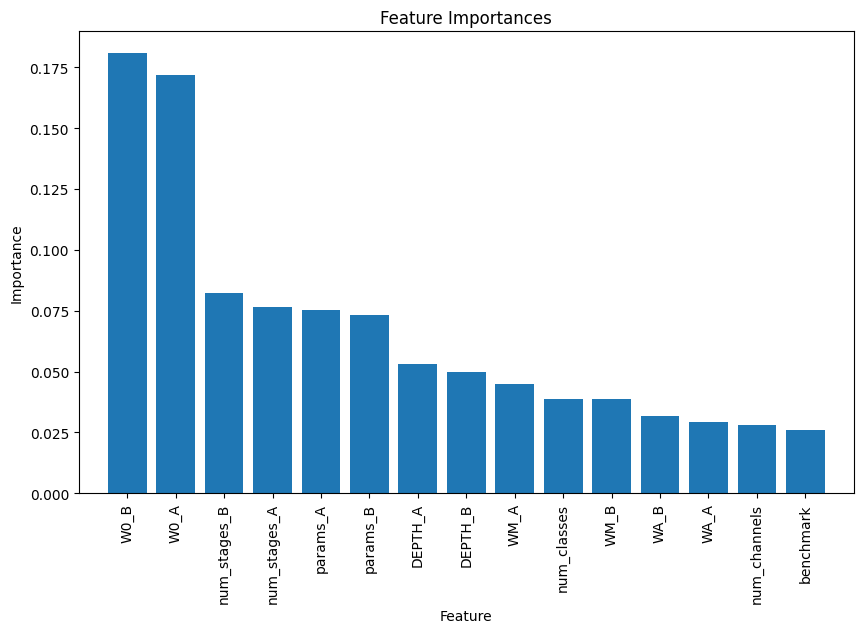

In [132]:
import matplotlib.pyplot as plt
importances = best_estimators["Random Forest"].feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.savefig("plots_predictor/feature_importances.png")
plt.show()

## Plot results

In [3]:
import json

with open('plots_predictor/epochs_results.json', 'r') as file:
    epochs_results = json.load(file)
with open('plots_predictor/accuracies.json', 'r') as file:
    accuracies = json.load(file)
with open('plots_predictor/test_accuracies.json', 'r') as file:
    test_accuracies = json.load(file)
with open('plots_predictor/corr_scores.json', 'r') as file:
    corr_scores = json.load(file)

In [453]:
test_accuracies["test_Gutenberg"][2]

{'Gradient Boosting': (0.5052631578947369, 0.5789473684210527),
 'Random Forest': (0.5842105263157895, 0.5789473684210527),
 'XGBoost': (0.5894736842105263, 0.5789473684210527)}

In [456]:
epochs_results[dataset][generation]

{'accuracy': {1: 0.6476190476190476,
  2: 0.3904761904761905,
  3: 0.6857142857142857,
  4: 0.6,
  5: 0.6,
  6: 0.5428571428571428,
  7: 0.3904761904761905,
  8: 0.5714285714285714,
  9: 0.5904761904761905,
  10: 0.47619047619047616},
 'correlation': {1: (0.3571428571428571, 0.29523809523809524),
  2: (-0.3571428571428571, -0.21904761904761905),
  3: (0.5, 0.37142857142857144),
  4: (0.23571428571428568, 0.20000000000000004),
  5: (0.2821428571428571, 0.20000000000000004),
  6: (0.05357142857142857, 0.08571428571428572),
  7: (-0.33571428571428563, -0.21904761904761905),
  8: (0.1714285714285714, 0.14285714285714288),
  9: (0.2964285714285714, 0.18095238095238098),
  10: (-0.11428571428571425, -0.04761904761904762)}}

In [457]:
test_accuracies.keys()

dict_keys(['test_Sadie', 'test_LaMelo', 'test_Chester', 'test_Gutenberg', 'test_Mateo', 'test_Adaline'])

In [472]:
accuracies_dfs=[]
generation=3
for dataset in test_accuracies.keys():
    print(dataset)
    baseline=pd.DataFrame(test_accuracies[dataset][generation-1]).iloc[1,0]
    acc_5= epochs_results[dataset][generation-1]["accuracy"][5]
    accuracies_df=pd.DataFrame(test_accuracies[dataset][generation-1]).head(1)
    accuracies_df["epoch5"]=acc_5
    accuracies_df["baseline"]=baseline
    accuracies_df=accuracies_df.T
    accuracies_df["dataset"]=dataset
    accuracies_df=accuracies_df.rename(columns={0:"acc"})
    accuracies_dfs.append(accuracies_df)
accuracies_dfs=pd.concat(accuracies_dfs).reset_index().rename(columns={"index":"predictor"})

test_Sadie
test_LaMelo
test_Chester
test_Gutenberg
test_Mateo
test_Adaline


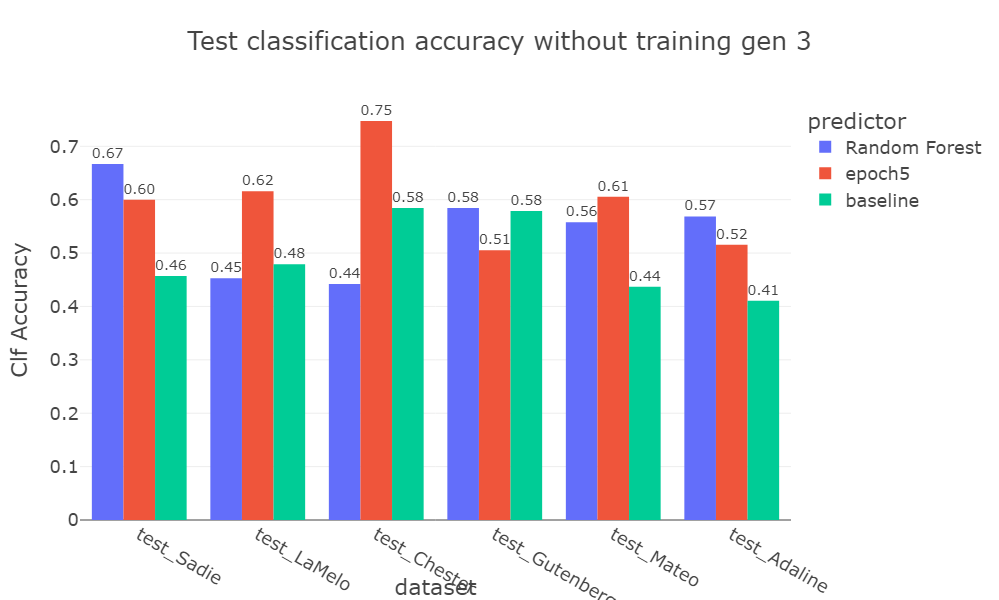

In [473]:
import plotly.express as px
accuracies_dfs=accuracies_dfs[~accuracies_dfs.predictor.isin(["Gradient Boosting","XGBoost"])]
fig = px.histogram(accuracies_dfs, x="dataset", y="acc",
             color='predictor', barmode='group',text_auto=".2f",
            title=f"Test classification accuracy without training gen {generation}"
             )
fig.update_yaxes(title_text='Clf Accuracy')
fig.update_layout(height=600, width=1000, template="presentation")
fig.update_traces(textfont_size=15, textangle=0, textposition="outside", cliponaxis=True)

In [73]:
#%pip install --proxy http://proxy:80 -U kaleido

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.5 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [475]:
pd.DataFrame(corr_scores[dataset][generation-1])

,Gradient Boosting,Random Forest,XGBoost
0,0.320301,0.148872,0.178947
1,0.252632,0.126316,0.178947
2,-0.233083,-0.233083,-0.233083
3,-0.178947,-0.178947,-0.178947


In [474]:
fig.write_image(f"plots_predictor/test_accuracy_histogram_gen_{generation}.png")

In [484]:
correlations_dfs=[]
generation=3
for dataset in corr_scores.keys():
    baseline_spearman=pd.DataFrame(corr_scores[dataset][generation-1]).iloc[2,0]
    baseline_tau=pd.DataFrame(corr_scores[dataset][generation-1]).iloc[3,0]
    corr_5, tau_5=epochs_results[dataset][generation-1]["correlation"][5]
    correlations_df=pd.DataFrame(corr_scores[dataset][generation-1]).head(2)
    correlations_df["corr_5"]=corr_5
    correlations_df["tau_5"]=tau_5
    correlations_df["baseline"]=baseline_spearman
    correlations_df["baseline_tau"]=baseline_tau

    correlations_df=correlations_df.T
    correlations_df["dataset"]=dataset
    correlations_df=correlations_df.rename(columns={0:"Spearman's Rank", 1:"Kendall's tau distance"})
    correlations_dfs.append(correlations_df)
correlations_dfs=pd.concat(correlations_dfs).reset_index().rename(columns={"index":"predictor"})

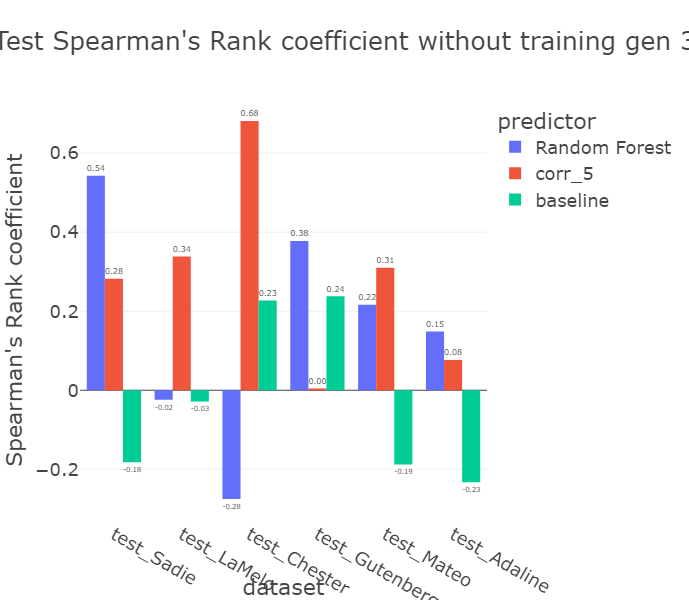

In [485]:
correlations_dfs=correlations_dfs[~correlations_dfs.predictor.isin(["Gradient Boosting","XGBoost"])]

fig = px.histogram(correlations_dfs[~correlations_dfs.predictor.isin(["tau_5","baseline_tau"])], x="dataset", y="Spearman's Rank",
             color='predictor', barmode='group',text_auto=".2f",
            title=f"Test Spearman's Rank coefficient without training gen {generation}"
             )
fig.update_yaxes(title_text="Spearman's Rank coefficient")
fig.update_layout(height=600, width=1000, template="presentation")
fig.update_traces(textfont_size=15, textangle=0, textposition="outside", cliponaxis=True)

In [486]:
fig.write_image(f"plots_predictor/test_correlations_histogram_gen_{generation}.png")

In [150]:
epochs_results["Sadie"][2]

{'accuracy': {'1': 0.6168067226890757,
  '2': 0.6521008403361345,
  '3': 0.653781512605042,
  '4': 0.6420168067226891,
  '5': 0.7176470588235294,
  '6': 0.6672268907563025,
  '7': 0.6857142857142857,
  '8': 0.6033613445378151,
  '9': 0.680672268907563,
  '10': 0.6285714285714286},
 'correlation': {'1': [0.2742296918767507, 0.23361344537815124],
  '2': [0.4372549019607843, 0.3042016806722689],
  '3': [0.43529411764705883, 0.30756302521008405],
  '4': [0.40896358543417366, 0.28403361344537814],
  '5': [0.6050420168067228, 0.43529411764705883],
  '6': [0.48879551820728295, 0.334453781512605],
  '7': [0.5086834733893558, 0.37142857142857144],
  '8': [0.2470588235294118, 0.20672268907563024],
  '9': [0.49859943977591037, 0.361344537815126],
  '10': [0.3554621848739496, 0.2571428571428571]}}

In [4]:
corr_epochs_dfs=[]
for dataset in epochs_results.keys():
    corr_epochs_df=pd.DataFrame(epochs_results[dataset][2]["correlation"]).T.rename(columns={0:"spearman's corr",1:"Kendall's distance"})
    corr_epochs_df["clf_correlation"]=corr_scores[dataset][2]["XGBoost"][0]
    corr_epochs_df["clf_kendall_dist"]=corr_scores[dataset][2]["XGBoost"][1]
    corr_epochs_df["dataset"]=dataset
    corr_epochs_dfs.append(corr_epochs_df)
corr_epochs_dfs=pd.concat(corr_epochs_dfs)

In [6]:
corr_epochs_dfs=corr_epochs_dfs.reset_index().rename(columns={"index":"epoch"})

In [7]:
corr_epochs_dfs

,epoch,spearman's corr,Kendall's distance,clf_correlation,clf_kendall_dist,dataset
0,1,0.743902,0.535897,0.158349,0.128205,Chester
1,2,0.774109,0.582051,0.158349,0.128205,Chester
2,3,0.809381,0.610256,0.158349,0.128205,Chester
3,4,0.789869,0.587179,0.158349,0.128205,Chester
4,5,0.784615,0.602564,0.158349,0.128205,Chester
...,...,...,...,...,...,...
65,6,0.662764,0.476529,0.564066,0.402560,Caitie
66,7,0.535398,0.379801,0.564066,0.402560,Caitie
67,8,0.669986,0.504979,0.564066,0.402560,Caitie
68,9,0.780501,0.598862,0.564066,0.402560,Caitie


In [13]:
corr_epochs_dfs = corr_epochs_dfs.melt(id_vars=['epoch',"dataset"], value_vars=["spearman's corr", "Kendall's distance", "clf_correlation", "clf_kendall_dist"], 
                     var_name='metric', value_name='score')

In [15]:
corr_epochs_dfs

,epoch,dataset,metric,score
0,1,Chester,spearman's corr,0.743902
1,2,Chester,spearman's corr,0.774109
2,3,Chester,spearman's corr,0.809381
3,4,Chester,spearman's corr,0.789869
4,5,Chester,spearman's corr,0.784615
...,...,...,...,...
275,6,Caitie,clf_kendall_dist,0.402560
276,7,Caitie,clf_kendall_dist,0.402560
277,8,Caitie,clf_kendall_dist,0.402560
278,9,Caitie,clf_kendall_dist,0.402560


In [29]:
import plotly.express as px
figs=[]
for dataset in corr_epochs_dfs.dataset.unique():
    fig = px.line(corr_epochs_dfs[(corr_epochs_dfs.dataset==dataset) & (corr_epochs_dfs.metric.isin(["spearman's corr","clf_correlation"]))], x='epoch', y="score", color='metric',
                  title=f'Spearman correlation {dataset}')

    # Adjust subplot titles
    fig.update_yaxes(title_text='', showticklabels=True)
    fig.update_xaxes(title_text='', showticklabels=True)
    fig.update_layout(template="presentation", height=600, width=900)
    fig.write_image(f"plots_predictor/{dataset}_correlation.png")
    figs.append(fig)

1
0
1
1
1
2
2
0
2
1
2
2
3
0


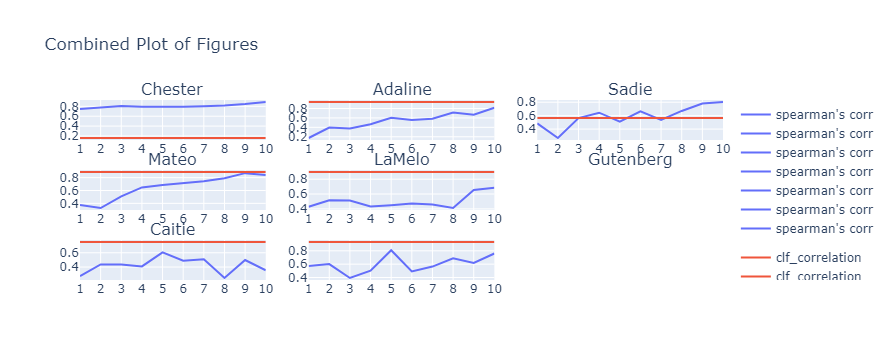

In [28]:
from plotly.subplots import make_subplots

# Create subplots with a 1x2 grid (one row, two columns)
fig_combined = make_subplots(rows=3, cols=3, subplot_titles=corr_epochs_dfs.dataset.unique())

# Add each figure to the subplots
total_figs=len(figs)
for i, fig in enumerate(figs, start=0):
    #print(i)
    print(int(i/3)+1)
    print(i%3)
    fig_combined.add_trace(fig.data[0], row=i%3+1, col=int(i/3)+1)
    fig_combined.add_trace(fig.data[1], row=i%3+1, col=int(i/3)+1)

# Update layout and display the combined plot
fig_combined.update_layout(title_text="Combined Plot of Figures")
fig_combined.show()

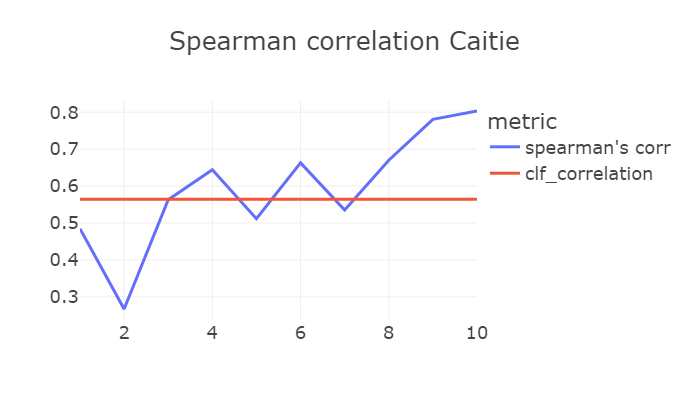

In [19]:
fig